In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from statsmodels.api import OLS, add_constant
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
df = pd.read_csv('/content/houseprice.csv')

In [4]:
df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crime rate                       506 non-null    float64
 1   residential land zone            506 non-null    float64
 2   business acres                   506 non-null    float64
 3   Charles River                    506 non-null    float64
 4   nitric oxides                    506 non-null    float64
 5   number of rooms                  506 non-null    float64
 6   age                              506 non-null    float64
 7   distances to employment centres  506 non-null    float64
 8   accessibility to highways        506 non-null    float64
 9   property-tax                     506 non-null    float64
 10  pupil-teacher ratio              506 non-null    float64
 11  lower income levels              506 non-null    float64
 12  Median Home Value     

In [6]:
df.shape

(506, 13)

<Figure size 1200x1000 with 0 Axes>

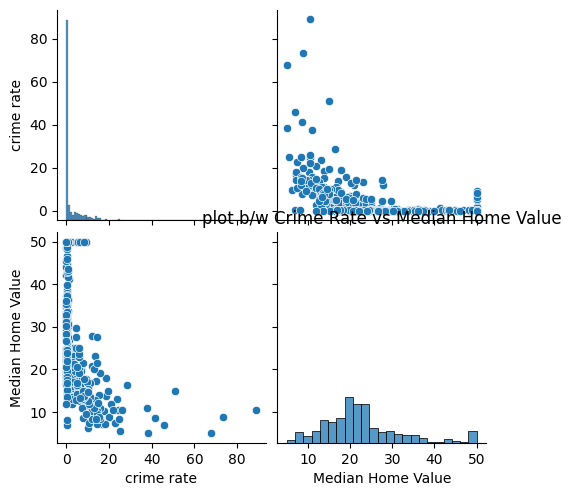

In [7]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[['crime rate', 'Median Home Value']])
plt.title("plot b/w Crime Rate vs Median Home Value")
plt.show()

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

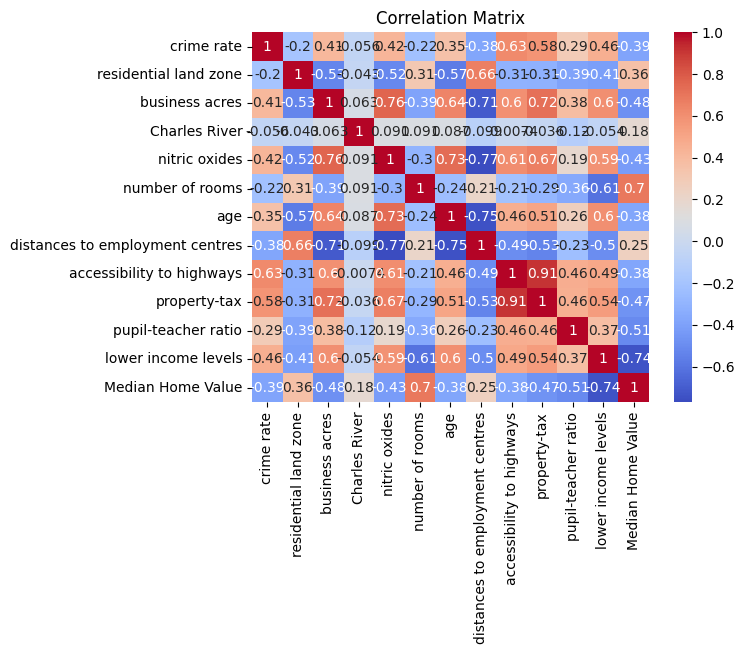

In [9]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature selection correlation

In [10]:
selected_features = ['crime rate', 'number of rooms', 'lower income levels']
X = df[selected_features]
y = df['Median Home Value']

# Feature Selection using SelectKBest

In [11]:
selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

In [12]:
print(f"Selected Features: {list(selected_features)}")

Selected Features: ['crime rate', 'number of rooms', 'lower income levels']


# Using OLS Linear Regression model, we are with feature selection

In [13]:
X_selected = df[selected_features]
X_selected = add_constant(X_selected)
y = df['Median Home Value']

In [14]:
model = OLS(y, X_selected).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Median Home Value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          1.01e-112
Time:                        17:27:43   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.5623    

In [15]:
crime_rate_coefficient = model.params['crime rate']
print(f"Impact of a 0.01 increase in crime rate: {crime_rate_coefficient * 0.01} dollars")


Impact of a 0.01 increase in crime rate: -0.0010294088671815157 dollars


-0.0010294088671815157 * 1000 = $1.029